In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import time
import requests
import json
import math

In [205]:
server_ip_address_port = '192.168.152.127:9080'
thing_name = 'ThingWatcherTest'
twx_app_key = 'd65f0557-9953-452a-b5c6-68cafd57fd28'

In [206]:
def update_property(property_name_, value):
    
    requests.put('http://' + server_ip_address_port + '/Thingworx/Things/' + thing_name + \
                '/Properties/' + property_name_, \
                 headers={'Accept': 'application/json', 'appKey': twx_app_key, \
                          'Content-Type': 'application/json'}, \
                data = json.dumps({property_name_: value}))   

In [207]:
update_property('prop_index_02', 135)

### Тест № 1 - Синусоида

#### Изменение формы сигнала с синусоидальной на прямоугольную.

In [62]:
x1 = np.array([math.sin(2*math.pi/16 * i) for i in range(1000) ])
x2 = np.sign(x1) + np.random.random_sample((len(x1),))/100

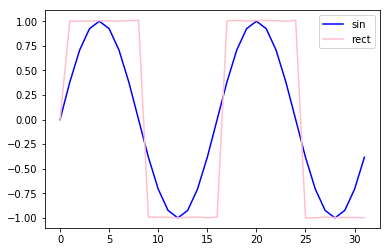

In [63]:
plt.plot(x1[:32], color='b', label='sin')
plt.plot(x2[:32], color='pink', label='rect')
plt.legend(loc='upper right')
plt.show()

#### Нормальные данные:

In [ ]:
i = 0
while True:
    update_property('prop_01', x1[i % 1000])
    update_property('prop_index_01', i % 1000)
    i +=1
    time.sleep(1.0)

#### Аномальные данные:

In [ ]:
i = 0
while True:
    update_property('prop_01', x2[i % 1000])
    update_property('prop_index_01', i % 1000)
    i +=1
    time.sleep(1.0)

### *Вывод:*
В качестве нормальных данных посылались данные из синусоидальной выборки. Затем в качестве аномальных - данные выпрямленной выборки. **ThingWatcher** корректно определял первые как нормальные, а вторые - как аномальные. <br>
Затем было произведено повторное обучение, но в качестве нормальных данных посылались данные выпрямленной выборки. После чего ThingWatcher корректно стал определять соответственно данные выпрямленной выборки как нормальные, а синусоидальные - как аномальные.

![Тест № 1](img/01.png)

### Тест № 2 Вероятностные распределения

In [156]:
# Статистические тесты
from scipy.stats import shapiro, ks_2samp

#### [Нормальное](https://en.wikipedia.org/wiki/Normal_distribution) распределение

In [131]:
mu, sigma = 0, 1.0 # mean and standard deviation
x3 = np.random.normal(mu, sigma, 1000)

In [234]:
x3_sample = np.random.normal(mu, sigma, 30)

In [235]:
print(shapiro(x3_sample))

(0.9621458053588867, 0.35105225443840027)


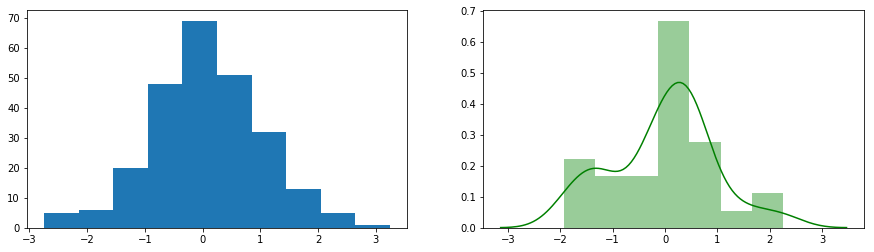

In [198]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((15,4))

ax[0].hist(x3_sample30)
ax[1] = sns.distplot(x3_sample, color='g')

In [212]:
pval = []
for i in range(1000):
    x3_sample = np.random.normal(mu, sigma, 30)
    
    test_results = shapiro(x3_sample)
    pval.append(test_results[1])

In [213]:
np.mean(np.array(pval) < 0.05)

0.045

#### Распределение [хи-квадрат](https://en.wikipedia.org/wiki/Chi-squared_distribution) ("Аномальное распределение")

In [237]:
x4 = np.random.chisquare(3, 1000)

In [238]:
x4_sample = np.random.chisquare(3, 30)

In [239]:
print(shapiro(x4_sample))

(0.7243366241455078, 3.59813589057012e-06)


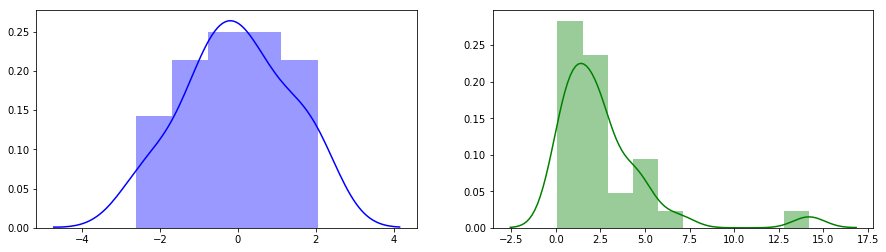

In [243]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((15,4))

sns.distplot(x3_sample, color='b', ax=ax[0])
sns.distplot(x4_sample, color='g', ax=ax[1])
plt.show()

####  Нормальная и аномальная выборки

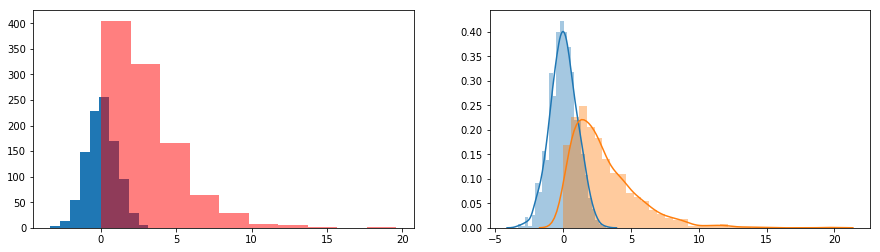

In [211]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches((15,4))

ax[0].hist(x3)
ax[0].hist(x4, color='red', alpha=0.5)

ax[1] = sns.distplot(x3)
ax[1] = sns.distplot(x4)

In [217]:
pval_4 = []
for i in range(1000):
    x4_sample = np.random.chisquare(3, 30)    
    test_results = shapiro(x4_sample)
    pval_4.append(test_results[1])

In [218]:
np.mean(np.array(pval_4) < 0.05)

0.865

In [219]:
np.count_nonzero(np.array(pval_4) > 0.05)

135

#### Тест [Колмогорова-Смирнова](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp) на одинаковость распределений двух выборок:

Выборки из разных распределений

In [181]:
sample_size_ = 30
pval_ks_ = []

for i in range(1000):
    x3_sample_ = np.random.normal(mu, sigma, sample_size_) 
    x4_sample_ = np.random.chisquare(3, sample_size_)    
    test_results_ = ks_2samp(x3_sample_, x4_sample_)
    pval_ks_.append(test_results_[1])

In [182]:
np.mean(np.array(pval_ks_) < 0.05)

1.0

In [183]:
np.mean(np.array(pval_ks_))

1.3357029243581275e-05

Выборки из одинаковых распределений

In [187]:
sample_size_ = 30
pval_ks_ = []

for i in range(1000):
    x3_sample_ = np.random.normal(mu, sigma, sample_size_) 
    x4_sample_ = np.random.normal(mu, sigma, sample_size_)    
    test_results_ = ks_2samp(x3_sample_, x4_sample_)
    pval_ks_.append(test_results_[1])

In [188]:
np.mean(np.array(pval_ks_) < 0.05)

0.044

In [189]:
np.mean(np.array(pval_ks_))

0.5369714880182852

#### Нормальные данные:

In [ ]:
while True:
    
    x3 = np.random.normal(mu, sigma, 1000) 
    
    for i in range(len(x3)):
    
        update_property('prop_02', x3[i % 1000])
        update_property('prop_index_02', i % 1000)
        i +=1
        time.sleep(1.0)

#### Аномальные данные

In [ ]:
while True:
    
    x4 = np.random.chisquare(3, 1000)
    
    for i in range(len(x4)):    
    
        update_property('prop_02', x4[i % 1000])
        update_property('prop_index_02', i % 1000)
        i +=1
        time.sleep(1.0)

### *Вывод:*
В качестве нормальных данных посылались данные из выборки со стандартным нормальным распределением *(0, 1)*. В качестве аномальных - данные из выборки с распределением хи-квадрат с тремя степенями свободы.
 **ThingWatcher** почти всегда (потребовалось повторное обучение) корректно определял первые как нормальные, а вторые - как аномальные. <br>
 
![Тест № 2](img/02.png)